## CAIXEIRO COM A GASOLINA INFINITA (E SEM CONSCIÊNCIA AMBIENTAL!!)

<hr>

## Introdução
Neste notebook, iremos resolver o problema com caixeiro viajante com a gasolina infinita, isto é, queremos encontrar o pior caminho possível para o caixeiro. O problema é do tipo NP-difícil.


Afim, de resolver o problema, considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

## Objetivo

Encontre o caminho de *maior* distância no problema do caixeiro viajante e mostre ele de forma gráfica.

## PASSO 1

### Vamos criar cidades?


In [1]:
import random as rd


def cria_cidades(n):
    """Cria um dicionário aleatório de cidades com suas posições (x,y).

    Argumentos
      n: inteiro positivo
        Número de cidades que serão visitadas pelo caixeiro.

    Retorno:
      Dicionário contendo o nome das cidades como chaves e a coordenada no plano
      cartesiano das cidades como valores.
    """

    cidades = {}

    for i in range(n):
        cidades[f"Cidade {i}"] = (rd.random(), rd.random())

    return cidades

## Importações

Todos os comandos de `import` devem estar dentro desta seção.

In [2]:
import random
from itertools import permutations

from funcoes import populacao_inicial_cv
from funcoes import funcao_objetivo_cv as funcao_objetivo_individuo
from funcoes import funcao_objetivo_pop_cv
from funcoes import selecao_torneio_max
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao
import matplotlib.pyplot as plt

## Código e Discussões

Esse problema é similar ao experimento A.07 em que temos um problema do caixeiro viajante com minimização, contudo, nesse caso vamos resolver o problema só que em uma situação em que o caixeiro é inimigo do meio ambiente e companheiro do agronegócio, isto é, desperdiça demais gasolina, logo, temos um problema de maximização.

In [3]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 1000

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 10
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

In [4]:
# Funções locais

def cria_populacao_inicial(tamanho, nada):
    return populacao_inicial_cv(tamanho, CIDADES)

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_max(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

In [5]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness    


In [6]:
print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 1', 'Cidade 0', 'Cidade 7', 'Cidade 3', 'Cidade 5', 'Cidade 4', 'Cidade 2', 'Cidade 9', 'Cidade 8', 'Cidade 6'] com distância: 6.925998000440871


### Vamos tentar permutar?

In [7]:
# Busca testando todas as permutações

melhor_fitness_top = 0

## Ixi tenho que continuar depois

### Bora graficar??

In [8]:
grafo_do_caminho = [] 

for i in melhor_individuo_ja_visto:
    grafo_do_caminho.append(CIDADES[str(i)])
print(grafo_do_caminho)

[(0.4530164151110133, 0.11620864528373509), (0.11959378872843607, 0.250911512742791), (0.7882236017833051, 0.5755146425175), (0.14939185585711978, 0.017571957851304387), (0.10529779727334032, 0.20921507992004318), (0.27658112080973807, 0.021168859545631524), (0.7206732588989685, 0.5861653802778447), (0.7011819627249178, 0.5792953882603908), (0.457020443457435, 0.2719665572684825), (0.14867685100090866, 0.9803294115917283)]


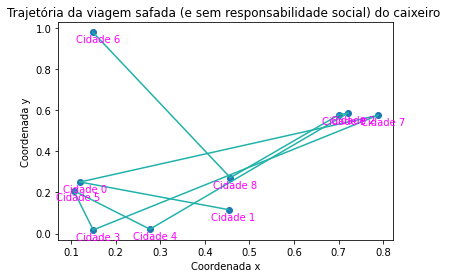

In [9]:
x = [ponto[0] for ponto in grafo_do_caminho]
y = [ponto[1] for ponto in grafo_do_caminho]

for n, nome in enumerate(melhor_individuo_ja_visto):
    plt.annotate(nome, (x[n], y[n]), textcoords = "offset points", xytext=(5, -10), ha='center', color = 'fuchsia')
    
#Plotando os pontos

plt.scatter(x,y)

#liga os pontos com segmentos de reta

for e in range(len(grafo_do_caminho)-1):
    plt.plot([grafo_do_caminho[e][0], grafo_do_caminho[e+1][0]], [grafo_do_caminho[e][1], grafo_do_caminho[e+1][1]], color = 'lightseagreen')
    
#Dando nome aos eixos

plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Trajetória da viagem safada (e sem responsabilidade social) do caixeiro ')

plt.show()

## Conclusão


## Playground

